In [ ]:
import nltk

# Téléchargez les ressources nécessaires pour l'analyse de sentiment VADER
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from datetime import datetime





finviz_url='https://finviz.com/quote.ashx?t='
tickers=['AMZN','AMD','GOOG']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    html=BeautifulSoup(response,'html')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

parsed_data=[]
for ticker,news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    if row.a:
      title= row.a.text
      date_data = row.td.text.strip()
      date_data=date_data.split(' ')
      if len(date_data)==1:
        time=date_data[0]

      else:
        date=date_data[0]
        if date_data[0]=='Today':
          date=datetime.now().date()
        time=date_data[1]
      parsed_data.append([ticker,date,time,title])
      #dataframe for this

df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])
df









,ticker,date,time,title
0,AMZN,2023-10-22,09:23AM,Nvidia Stock Is a Battleground: Perspectives F...
1,AMZN,2023-10-22,08:45AM,2 Top Artificial Intelligence (AI) Stocks to B...
2,AMZN,2023-10-22,05:30AM,"Meta, Amazon Earnings Put Stock Market to the ..."
3,AMZN,Oct-21-23,09:00PM,Google and Apple Want You to Log In With Passk...
4,AMZN,Oct-21-23,01:30PM,Humanoid robots face a major test with Amazon'...
...,...,...,...,...
295,GOOG,Oct-16-23,12:10PM,Big tech earnings: What to expect from Q3 results
296,GOOG,Oct-16-23,12:00PM,Google's Tech Could Let AI Skip Training
297,GOOG,Oct-16-23,11:45AM,Is Google Stock A Buy Amid Justice Department ...
298,GOOG,Oct-16-23,11:40AM,Google wants to get rid of your passwords (her...


In [ ]:
vader=SentimentIntensityAnalyzer()
f=lambda title: vader.polarity_scores(title)['compound']
df['compound']=df['title'].apply(f)
df
#print(vader.polarity_scores("I don't think appele is not a good company.I think they won't do poorly this quarter."))

,ticker,date,time,title,compound
0,AMZN,2023-10-22,09:23AM,Nvidia Stock Is a Battleground: Perspectives F...,-0.4019
1,AMZN,2023-10-22,08:45AM,2 Top Artificial Intelligence (AI) Stocks to B...,0.5994
2,AMZN,2023-10-22,05:30AM,"Meta, Amazon Earnings Put Stock Market to the ...",0.1779
3,AMZN,Oct-21-23,09:00PM,Google and Apple Want You to Log In With Passk...,0.0772
4,AMZN,Oct-21-23,01:30PM,Humanoid robots face a major test with Amazon'...,0.0000
...,...,...,...,...,...
295,GOOG,Oct-16-23,12:10PM,Big tech earnings: What to expect from Q3 results,0.0000
296,GOOG,Oct-16-23,12:00PM,Google's Tech Could Let AI Skip Training,0.0000
297,GOOG,Oct-16-23,11:45AM,Is Google Stock A Buy Amid Justice Department ...,0.5267
298,GOOG,Oct-16-23,11:40AM,Google wants to get rid of your passwords (her...,0.0000


<ipython-input-46-cfaa62cce440>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df=df.groupby(['ticker','date']).mean()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x800 with 0 Axes>

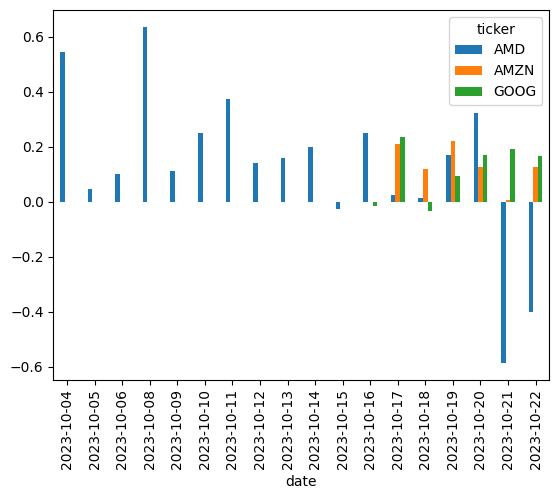

In [ ]:
df['date']=pd.to_datetime(df.date).dt.date


plt.figure(figsize=(10,8))
mean_df=df.groupby(['ticker','date']).mean()
mean_df=mean_df.unstack()
mean_df=mean_df.xs('compound',axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show